# **Lazada Technical Assessment**

# **Analysis Workflow**

**1. Understanding the dataset/problem and simple data wrangling**
  - 1.1 Check the dataframe dimensions and datatypes
  - 1.2 Check for missing values
  - 1.3 Datatype conversion logic
  - 1.4 Feature Engineering
  - 1.5 Key intuitions on the dataset and problems to be solved/optimized for the organization

**2. Univariate analysis of dependent variable**
  - 2.1 Basic statistical summary (descriptive analytics) of visits on an aggregate level
  - 2.2 Boxplot for visualization of outliers and better grasp of the data spread
  - 2.3 Examine the users who visit a report >100 times in a day

**3. Multivariate analysis of variables**
  - 3.1 Lineplot of Total Number of Visits Per Day
  - 3.2 Barplot of Total Number of Visits Per Quarter
  - 3.3 Barplot of Total Number of Visits Per Month
  - 3.4 Barplot of Total Number of Visits Per Day of Week
  - 3.5 Barplot of Total Number of Visits for Top 20 Reports
  - 3.6 Barplot of Total Number of Visits for Top 20 Visitors
  - 3.7 Barplot of Total Number of Visits for Top 20 Departments
  - 3.8 Barplot of Total Number of Visits Based on Makers
  - 3.9 Top 20 Repeated Visits by Users
  - 3.10 Top 3 Visits by Departments per Month
  - 3.11 Last Visit Date for Reports
  - 3.12 Daily Total Number of Visits for Reports

**4. Findings and recommendations**

**5. Conclusions and future work**

**Data loading/preliminary checks for corrupted data before moving into the analysis workflow**

Import relevant libraries for data manipulation/analytics/visualization

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from IPython.display import Markdown, display
from pandas.api.types import CategoricalDtype
warnings.filterwarnings('ignore')

In [2]:
def printmd(string):
    """
    Format text in code cell.

    Parameter
    ----------
    string : str
        String to format.

    Prints
    -------
    str
        Formatted string.
    """
    display(Markdown(string))

Load CSV file as Pandas DataFrame

In [3]:
report_views = pd.read_csv('report_views.csv')

Examine that the dataset is loaded correctly by looking at the first few rows
- No apparent issues for now based on visual inspection

In [4]:
report_views.head()

,Stat_Date,Report_ID,Visitor_ID,Department_ID,Maker_ID,Visits
0,2021-11-24,report_1,user_1,Dept_1,maker_1,5
1,2021-11-23,report_1,user_1,Dept_1,maker_1,4
2,2021-11-22,report_1,user_1,Dept_1,maker_1,2
3,2021-11-21,report_1,user_1,Dept_1,maker_1,2
4,2021-11-20,report_1,user_1,Dept_1,maker_1,3


## **1. Understanding the dataset/problem and simple data wrangling**

### **1.1 Check the dataframe dimensions and datatypes**
- Decent number of rows with relatively few columns
- Datatypes consist of only object and int64
  - Probably can convert some of the columns to more suitable datatypes for analysis

In [5]:
printmd("**report_views DataFrame**")
print("Number of rows: ", report_views.shape[0])
print("Number of columns: ", report_views.shape[1])
print("\n")
print("----Column Datatypes----")
print(report_views.dtypes)

**report_views DataFrame**

Number of rows:  207471
Number of columns:  6


----Column Datatypes----
Stat_Date        object
Report_ID        object
Visitor_ID       object
Department_ID    object
Maker_ID         object
Visits            int64
dtype: object


### **1.2 Check for missing values**
- Data has no missing values 

In [6]:
printmd("**Number of missing values**")
report_views.isna().sum()

**Number of missing values**

Stat_Date        0
Report_ID        0
Visitor_ID       0
Department_ID    0
Maker_ID         0
Visits           0
dtype: int64

### **1.3 Datatype conversion logic**

Mainly consider the purpose of the column and use the number of unique values in the column as a secondary guide
- **Stat_Date:** Date that the statistics is for
  - Can be converted to date format to perform analysis based on different periods or a simple time series analysis for visits over time
- **Report_ID:** Identifier of the report that was visited
  - Can remain as object datatype (similar to categorical datatype)
- **Visitor_ID:** Identifier of the visitor who visited the report
  - Can remain as object datatype
- **Department_ID:** Identifier of the Department which the visitor belongs to
  - Can remain as object datatype
- **Maker_ID:** Identifier of the maker of the report
  - Can remain as object datatype
- **Visits:** Number of visits made by the visitor on the Stat_Date
  - Can remain as integer datatype (arithmetic operations/numerical analysis)
  - Mainly the variable of interest (numerical) through which other variables (categorical/date) influence

  Note: ID based columns (e.g. Report_ID) can be converted to integer datatype for space saving and performance reasons. However, since it wouldn't make sense to perform arithemetic operations (+-*/) on them (initial thought), I would prefer not performing the conversion for now.

In [7]:
printmd("**Number of unique values**")
report_views.nunique()

**Number of unique values**

Stat_Date         334
Report_ID         490
Visitor_ID       3374
Department_ID     731
Maker_ID            7
Visits            107
dtype: int64

Convert the Stat_Date column from object to datetime64[ns] datatype

In [8]:
report_views['Stat_Date'] = pd.to_datetime(report_views['Stat_Date'])

In [9]:
printmd("**Column datatypes information**")
report_views.dtypes

**Column datatypes information**

Stat_Date        datetime64[ns]
Report_ID                object
Visitor_ID               object
Department_ID            object
Maker_ID                 object
Visits                    int64
dtype: object

### **1.4 Feature Engineering**
- Can extract more useful temporal columns from Stat_Date column (YYYY-MM-DD) since it's in datetime format
  - **Quarter of the year column**
    - Useful for analyzing report visits based on the quarter
    - Can identify patterns such as peak/lull season on a higher level (quarterly report planning/optimization)
  - **Month column**
    - Useful for analyzing report visits on a monthly basis
    - Continuation of the quarterly analysis for more detailed planning
  - **Day of week name column**
    - Useful for analyzing report visits based on day of week (Monday-Sunday)
    - More granular and specific
    - Good to identify weekly patterns and departments can optimize report updates frequently

Note: The year only has 2021 so no extraction is needed since there's no variability at all. We will also keep the original Stat_Date column as it provides a date sequence for ordering of data or time series analysis.

In [10]:
report_views['Quarter'] = report_views['Stat_Date'].dt.quarter
report_views['Month'] = report_views['Stat_Date'].dt.month
report_views['day_of_week'] = report_views['Stat_Date'].dt.day_name()

In [11]:
report_views.head()

,Stat_Date,Report_ID,Visitor_ID,Department_ID,Maker_ID,Visits,Quarter,Month,day_of_week
0,2021-11-24,report_1,user_1,Dept_1,maker_1,5,4,11,Wednesday
1,2021-11-23,report_1,user_1,Dept_1,maker_1,4,4,11,Tuesday
2,2021-11-22,report_1,user_1,Dept_1,maker_1,2,4,11,Monday
3,2021-11-21,report_1,user_1,Dept_1,maker_1,2,4,11,Sunday
4,2021-11-20,report_1,user_1,Dept_1,maker_1,3,4,11,Saturday


### **1.5 Key intuitions on the dataset and problems to be solved/optimized for the organization**
- Dataset is essentially a **visit log** 
  - recording **how many times** (Visits) 
  - each visitor (Department_ID/Visitor_ID) 
  - visited a report (Report_ID) 
  - on **what** date (Stat_Date) and
  - **who** (Maker_ID) made each report
- What **problems (current/potential) can we solve** for the organization by optimizing the reporting structure?
  - Are the data in the report **relevant and sufficient** for various visitors/department?
    - If no one is using the report, find out what data can be collected and included in the report to be useful
  - Are there **enough report makers** to serve the entire organization?
    - Do we need more people to work on analytical reporting?
    - Or, are certain reports not being used at all and can be made redundant?
  - What **period (quarter, month, day of week)** do reports tend to get visited the most?
    - Optimize the report update frequency
  - How are the reports being **shared** across different users/departments?
    - Is there only 1 department using a particular report or are the reports being utilized across multiple departments?
  - Do departments/users only visit reports **once** and never use them again or they **constantly revisit** the updated reports?
    - Can check how long a report has not been visited and clarify with the last department/user who used them
    - Is it worth the effort to come up with comprehensive reports if they are mostly one-off? 
    - Ensure effort spent by data analytics/business intelligence team is not gone to waste

## **2. Univariate analysis of dependent variable (Visits)**

### **2.1 Basic statistical summary (descriptive analytics) of visits on an aggregate level**
  - On any given day, the average visitor accesses a report for around **4.6** times
  - The minimum amount of times a user visits a report in a single day is **1** time
    - Not surprising as if there's no visit, it won't be on the visit log anyway
  - The maximum amount of times a user visits a report in a single day is **536** times
    - Might be an error, need to visualize the distribution of visits for better understanding
    - Confirm with the user

On any given day, the average visitor accesses a report for around 4.6 times. The maximum amount of times a user visits a report in a single day is 536 times.

In [12]:
report_views['Visits'].describe()

count    207471.000000
mean          4.634653
std           3.911152
min           1.000000
25%           3.000000
50%           4.000000
75%           5.000000
max         536.000000
Name: Visits, dtype: float64

### **2.2 Boxplot for visualization of outliers and better grasp of the data spread**
  - Number of visits mainly clustered from 1-10
  - Outliers (as determined by boxplot: Q3 + 1.5IQR) below 100 visits can be reasonable depending on the role of the user
    - Assuming 8 hours of work a day (480 mins), that (100 visits) averages out to **a report visit every 4.8 mins**
    - Beyond that, the user might be using a script to access the report periodically and mine for updated information
  - Since I'm not sure of the reason for the extremely high number of visits by the user yet, I **will not remove the outlier for now**

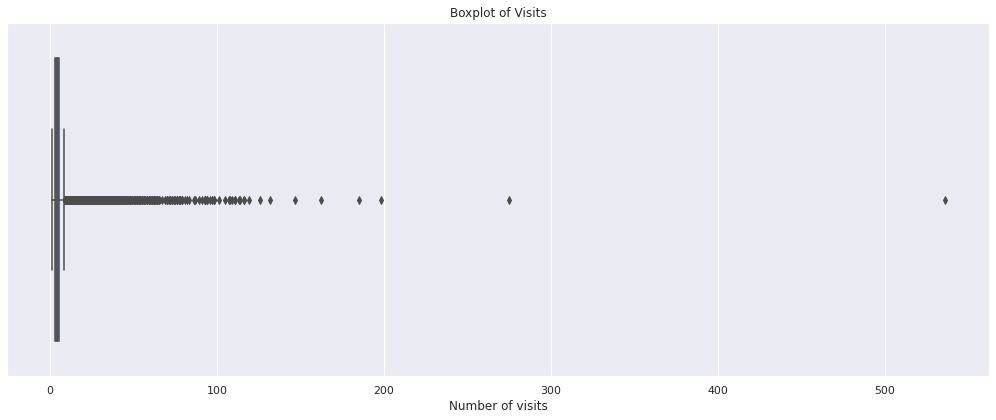

In [13]:
sns.set(rc = {"figure.figsize": (14, 6)})
sns.boxplot(x = report_views['Visits'])
plt.title("Boxplot of Visits")
plt.xlabel('Number of visits')
plt.tight_layout()
plt.show()

### **2.3 Examine the users who visit a report >100 times in a day**
- Take note of the following users and ask them for more details
  - Visitor_ID: 400/472/568/588/601/1168/1380/1635/2214/2290/2989
- The users are also mostly repeated users
  - Find out whether they have special requirements if they are legitimate visits and not bugs/errors
  - Design a better report access plan for them if possible

In [14]:
report_views.loc[report_views['Visits'] > 100]

,Stat_Date,Report_ID,Visitor_ID,Department_ID,Maker_ID,Visits,Quarter,Month,day_of_week
175016,2021-03-23,report_249,user_2989,Dept_628,maker_7,111,1,3,Tuesday
175052,2021-02-10,report_249,user_2989,Dept_628,maker_7,107,1,2,Wednesday
177047,2021-09-11,report_31,user_2214,Dept_338,maker_4,108,3,9,Saturday
177096,2021-03-27,report_31,user_2214,Dept_338,maker_4,198,1,3,Saturday
177182,2021-03-27,report_31,user_2290,Dept_292,maker_4,132,1,3,Saturday
189483,2021-06-07,report_253,user_1168,Dept_133,maker_1,275,2,6,Monday
190254,2021-07-05,report_203,user_601,Dept_20,maker_7,162,3,7,Monday
190544,2021-07-05,report_203,user_588,Dept_20,maker_7,126,3,7,Monday
190573,2021-10-25,report_201,user_1380,Dept_23,maker_7,185,4,10,Monday
190582,2021-10-15,report_201,user_1380,Dept_23,maker_7,536,4,10,Friday


## **3. Multivariate analysis of variables**

### **3.1 Lineplot of Total Number of Visits Per Day**
- Obvious **weekly seasonality** where certain days have more reports being visited
- Certain months/quarters have more visits as well (use the engineered features to drill down later)
- Overall, visit for reports are rather predictable on an aggregate basis

Note: Time is treated as a feature here (not index), thus this plot is classified under multivariate analysis

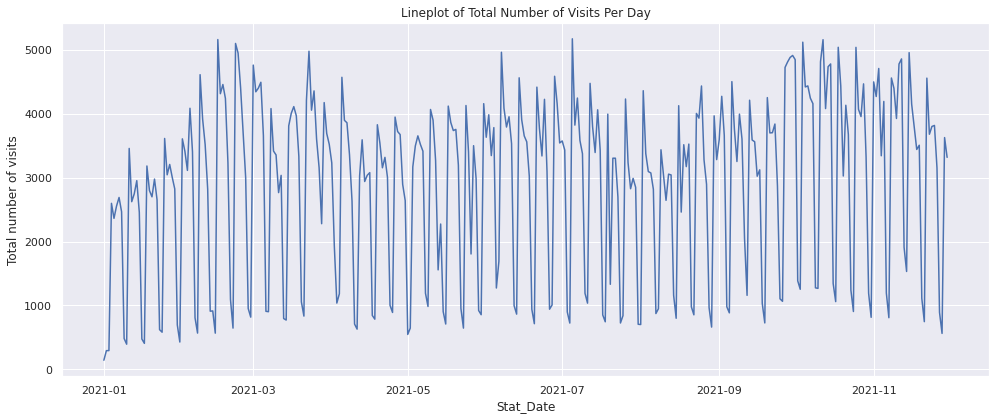

In [15]:
grouped_visits_by_date = report_views['Visits'].groupby(report_views['Stat_Date']).sum()
sns.lineplot(grouped_visits_by_date.index, grouped_visits_by_date)
plt.title("Lineplot of Total Number of Visits Per Day")
plt.ylabel('Total number of visits')
plt.tight_layout()
plt.show()

### **3.2 Barplot of Total Number of Visits Per Quarter**
- Quarter 3 has slightly more visits than 1 and 2
- Quarter 4 has a significant drop in report visits
  - Might be lull period for the company and departments are not actively seeking for report data for analysis

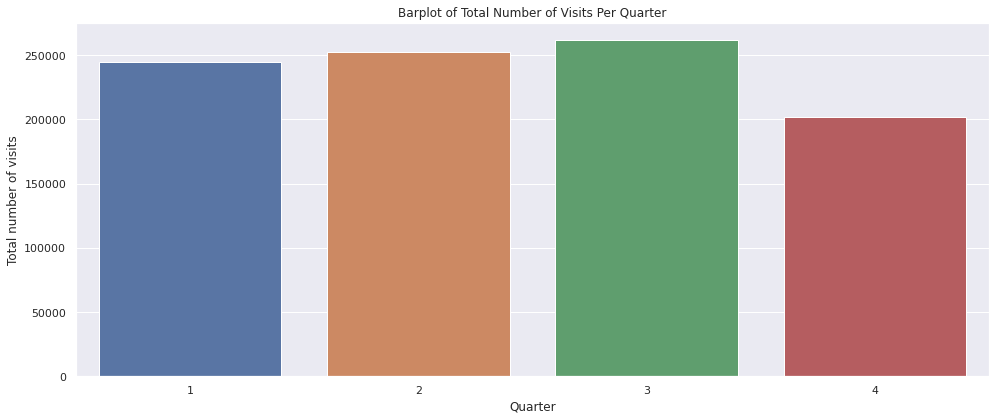

In [16]:
grouped_visits_by_quarter = report_views['Visits'].groupby(report_views['Quarter']).sum()
sns.barplot(grouped_visits_by_quarter.index, grouped_visits_by_quarter)
plt.title("Barplot of Total Number of Visits Per Quarter")
plt.ylabel('Total number of visits')
plt.tight_layout()
plt.show()

### **3.3 Barplot of Total Number of Visits Per Month**
- Can observe a bump in report visits every 3rd month 
  - Probably end of quarter reporting or performance analysis for departments
- January has the lowest number of visits
  - Probably start of year and reporting data is still accummulating

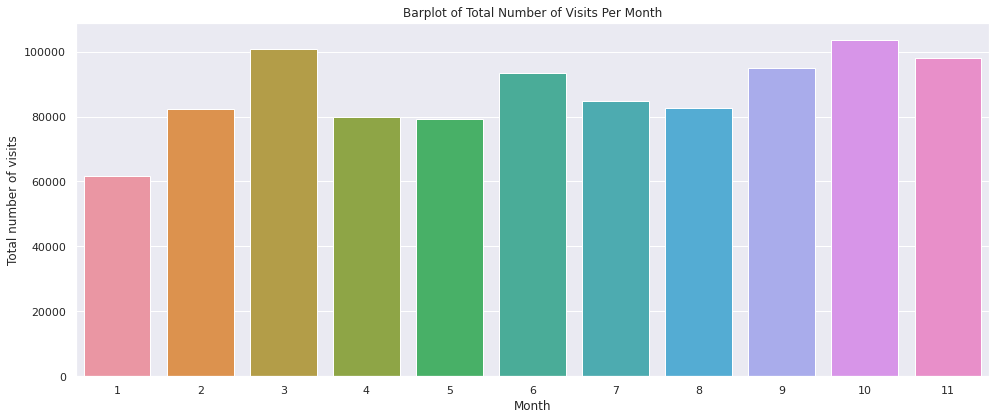

In [17]:
grouped_visits_by_month = report_views['Visits'].groupby(report_views['Month']).sum()
sns.barplot(grouped_visits_by_month.index, grouped_visits_by_month)
plt.title("Barplot of Total Number of Visits Per Month")
plt.ylabel('Total number of visits')
plt.tight_layout()
plt.show()

### **3.4 Barplot of Total Number of Visits Per Day of Week**
- Results are not unexpected generally
- Monday has the highest number of visits and gradually taper off
  - Start of week performance data analysis and target setting (KPI)
- Saturday and Sunday have significantly lower visits as less people are working

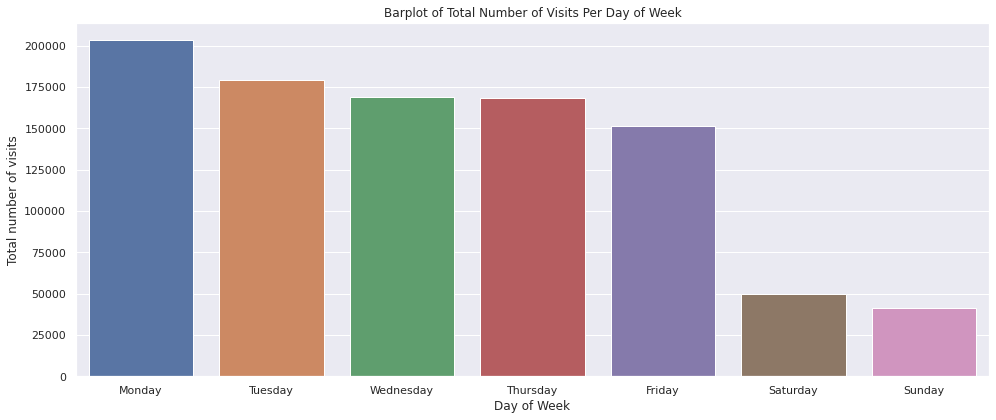

In [18]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories = cats, ordered = True)
grouped_visits_by_dow = report_views['Visits'].groupby(report_views['day_of_week']).sum().reindex(cats)
sns.barplot(grouped_visits_by_dow.index, grouped_visits_by_dow)
plt.title("Barplot of Total Number of Visits Per Day of Week")
plt.xlabel('Day of Week')
plt.ylabel('Total number of visits')
plt.tight_layout()
plt.show()

### **3.5 Barplot of Total Number of Visits for Top 20 Reports**
- Only show top 20 due to space limitations
  - Top 10 most popular reports make up majority of visit counts
- **Report 1 and 2** probably contain important data which are constantly demanded by multiple departments
  - **Financial indicators** such as revenue, profit/loss, cost figures
  - **Product metrics** such as conversion rate, daily active user, session duration
- The less popular reports might contain very **niche information** that are only specific to 1 department or even a few users only
  - Might contain qualitative data that are not updated frequently thus users visit once and never return
- Discuss with makers of those low popularity reports whether to still keep them in the database or how to improve the usage

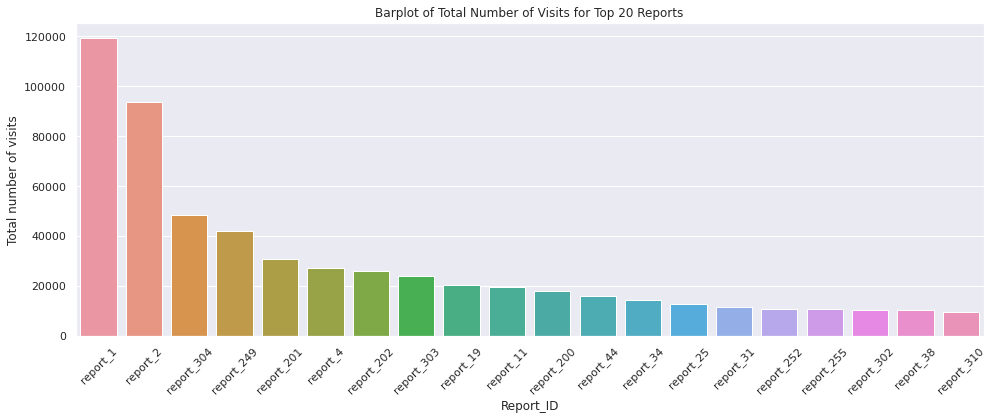

In [19]:
grouped_visits_by_report = report_views['Visits'].groupby(report_views['Report_ID']).sum().sort_values(ascending = False).head(20)
sns.barplot(grouped_visits_by_report.index, grouped_visits_by_report)
plt.title("Barplot of Total Number of Visits for Top 20 Reports")
plt.ylabel('Total number of visits')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

### **3.6 Barplot of Total Number of Visits for Top 20 Visitors**
- 2 users dominate the visit count (user 2989 and 568)
- Can discuss with the 2 users about their experience accessing the reports and whether anything can be improved about the process

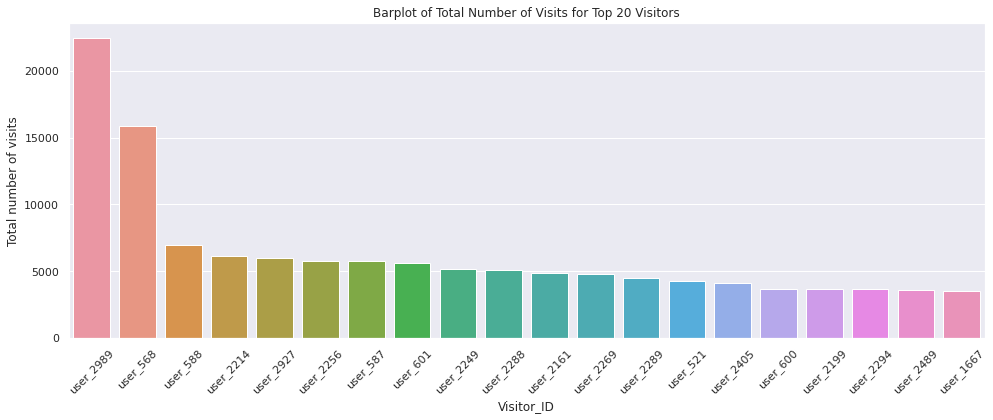

In [20]:
grouped_visits_by_visitor = report_views['Visits'].groupby(report_views['Visitor_ID']).sum().sort_values(ascending = False).head(20)
sns.barplot(grouped_visits_by_visitor.index, grouped_visits_by_visitor)
plt.title("Barplot of Total Number of Visits for Top 20 Visitors")
plt.ylabel('Total number of visits')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

- Check the users' department
  - Seems like the users change departments quite frequently

In [21]:
report_views.loc[(report_views['Visitor_ID'] == 'user_2989') | (report_views['Visitor_ID'] == 'user_568')]

,Stat_Date,Report_ID,Visitor_ID,Department_ID,Maker_ID,Visits,Quarter,Month,day_of_week
12240,2021-10-15,report_1,user_568,Dept_20,maker_1,5,4,10,Friday
12310,2021-09-22,report_1,user_568,Dept_20,maker_1,5,3,9,Wednesday
12330,2021-09-13,report_1,user_568,Dept_20,maker_1,2,3,9,Monday
12413,2021-07-16,report_1,user_568,Dept_20,maker_1,4,3,7,Friday
12547,2021-05-13,report_1,user_568,Dept_63,maker_1,3,2,5,Thursday
...,...,...,...,...,...,...,...,...,...
202890,2021-01-13,report_157,user_568,Dept_71,maker_2,6,1,1,Wednesday
202891,2021-01-07,report_197,user_568,Dept_71,maker_2,7,1,1,Thursday
202892,2021-01-02,report_157,user_568,Dept_71,maker_2,9,1,1,Saturday
204174,2021-04-13,report_253,user_568,Dept_63,maker_1,8,2,4,Tuesday


### **3.7 Barplot of Total Number of Visits for Top 20 Departments**
- Department 1 and 2 dominate the visit count
- Same as above, can discuss with the 2 departments about their experience accessing the reports and whether anything can be improved about the process
- Observation: The top 2 users are not from the top 2 departments

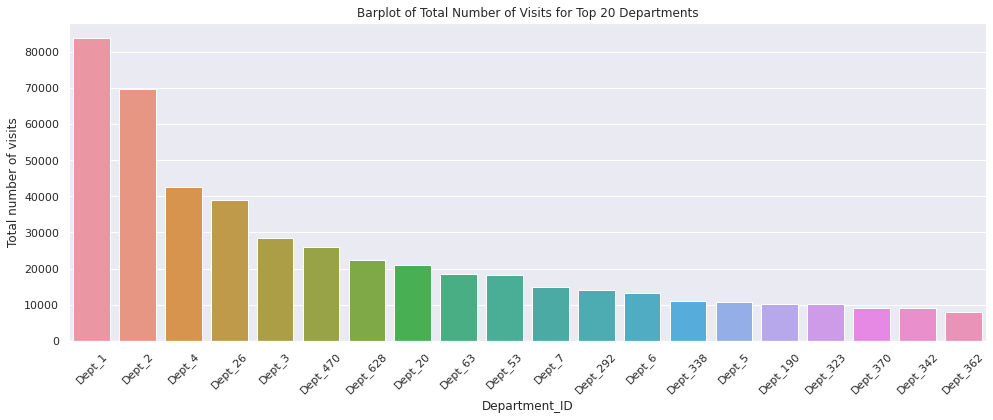

In [22]:
grouped_visits_by_department = report_views['Visits'].groupby(report_views['Department_ID']).sum().sort_values(ascending = False).head(20)
sns.barplot(grouped_visits_by_department.index, grouped_visits_by_department)
plt.title("Barplot of Total Number of Visits for Top 20 Departments")
plt.ylabel('Total number of visits')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

### **3.8 Barplot of Total Number of Visits Based on Makers**
- Makers 1, 2, 4 dominate the visit count
- Depending on whether the maker of the report is inhouse or outsourced, we can improve different processes
  - If outsourced, can we engage the successful makers to generate more reports so they are better utilized by the employees?
  - If inhouse, can the makers handle the report generation process efficiently?

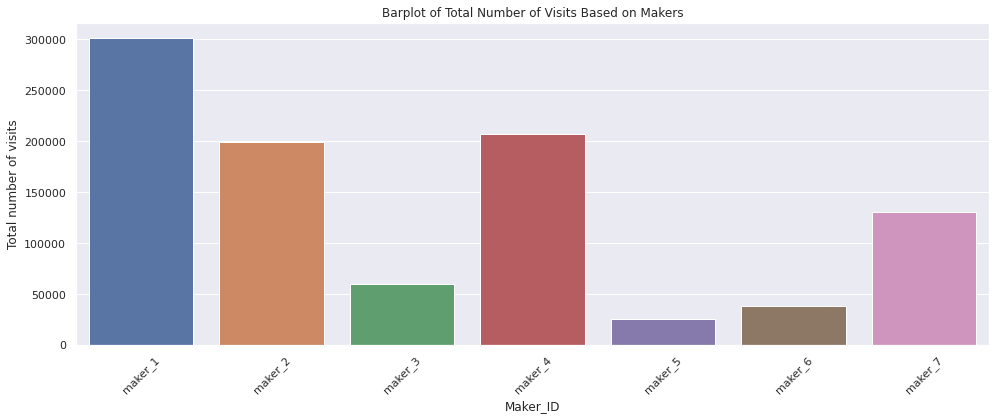

In [23]:
grouped_visits_by_maker = report_views['Visits'].groupby(report_views['Maker_ID']).sum()
sns.barplot(grouped_visits_by_maker.index, grouped_visits_by_maker)
plt.title("Barplot of Total Number of Visits Based on Makers")
plt.ylabel('Total number of visits')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

- Find out how many unique reports each maker generates
  - Maker 1, despite generating only 69 reports, has an overwhelmingly large number of visits
  - Makers 2 generates much more reports than the others, thus correspondingly have more visits
  - Makers 4 and 7 also generate a decent amount of unique reports

It might not be a coincidence that makers 1 and 2 generate reports 1 and 2 which are established to be the most visited reports earlier on. They probably contain important information for many users/departments.

In [24]:
report_views['Report_ID'].groupby(report_views['Maker_ID']).nunique()

Maker_ID
maker_1     69
maker_2    184
maker_3     37
maker_4     72
maker_5     30
maker_6     25
maker_7     73
Name: Report_ID, dtype: int64

In [25]:
report_views.loc[report_views['Report_ID'] == 'report_1'].head()

,Stat_Date,Report_ID,Visitor_ID,Department_ID,Maker_ID,Visits,Quarter,Month,day_of_week
0,2021-11-24,report_1,user_1,Dept_1,maker_1,5,4,11,Wednesday
1,2021-11-23,report_1,user_1,Dept_1,maker_1,4,4,11,Tuesday
2,2021-11-22,report_1,user_1,Dept_1,maker_1,2,4,11,Monday
3,2021-11-21,report_1,user_1,Dept_1,maker_1,2,4,11,Sunday
4,2021-11-20,report_1,user_1,Dept_1,maker_1,3,4,11,Saturday


In [26]:
report_views.loc[report_views['Report_ID'] == 'report_2'].head()

,Stat_Date,Report_ID,Visitor_ID,Department_ID,Maker_ID,Visits,Quarter,Month,day_of_week
14259,2021-10-15,report_2,user_471,Dept_6,maker_2,3,4,10,Friday
14260,2021-09-27,report_2,user_458,Dept_6,maker_2,4,3,9,Monday
14261,2021-09-20,report_2,user_458,Dept_6,maker_2,3,3,9,Monday
14262,2021-08-16,report_2,user_458,Dept_6,maker_2,3,3,8,Monday
14263,2021-08-09,report_2,user_458,Dept_6,maker_2,3,3,8,Monday


### **3.9 Top 20 Repeated Visits by Users**
- Here we attempt to find out which visitors visit a particular report for the most amount of times
- The top visit count is made by **user_2989** on **report_249** for a total of **3522 visits**
  - He/she also occupy the 2nd top visit count for report_304 for a total of 2822 visits
- Using this statistic, the maker of the report can **find out its most frequent visitors** and gather feedback on the quality of the report

In [27]:
top_20_report_visitor = report_views['Visits'].groupby([report_views['Report_ID'], report_views['Visitor_ID']]).sum().sort_values(ascending = False).head(20)

In [28]:
top_20_report_visitor

Report_ID   Visitor_ID
report_249  user_2989     3522
report_304  user_2989     2822
            user_689      2239
report_4    user_2396     2172
report_1    user_472      2128
report_4    user_931      1739
report_19   user_2269     1726
report_302  user_1667     1649
report_64   user_2989     1589
report_249  user_1278     1578
            user_587      1524
report_2    user_2989     1511
report_197  user_568      1499
report_4    user_2522     1491
report_297  user_1667     1491
report_40   user_2989     1479
report_2    user_106      1469
report_249  user_600      1451
report_19   user_2256     1446
report_1    user_2989     1434
Name: Visits, dtype: int64

### **3.10 Top 3 Visits by Departments per Month**
- Here we attempt to find out which departments made the most visits every month regardless of report types
  - Which departments frequently access reports on certain month(s)?
  - Are there any departments that we can prioritise by ensuring the reports are updated before their heavy usage months?
- In month 1, departments 2, 1, 3 were the top 3 in terms of visits
- In month 2, departments 1, 2, 4 were the top 3 in terms of visits
- Visually inspecting the table, it appears that departments **1, 2, 4** are major visitors throughout the entire year while department **26** appears mostly in the 2nd half of the year

In [29]:
top_3_dep_month = pd.DataFrame(report_views.groupby(['Month', 'Department_ID'])['Visits'].sum()).sort_values(['Month', 'Visits'], ascending = [True, False]).groupby(['Month']).head(3)

In [30]:
top_3_dep_month

Visits
Month Department_ID        
1     Dept_2           6446
      Dept_1           3063
      Dept_370         2928
2     Dept_1           8064
      Dept_2           6463
      Dept_4           4033
3     Dept_1           9608
      Dept_63          7236
      Dept_2           6689
4     Dept_1           7186
      Dept_2           5771
      Dept_63          3299
5     Dept_1          10313
      Dept_4           4720
      Dept_2           3486
6     Dept_1           9276
      Dept_4           4844
      Dept_26          4643
7     Dept_1           7901
      Dept_4           4682
      Dept_20          4622
8     Dept_2           5743
      Dept_1           5528
      Dept_26          5305
9     Dept_2           8549
      Dept_1           6726
      Dept_26          5292
10    Dept_2          10695
      Dept_1           8125
      Dept_26          6991
11    Dept_2           8396
      Dept_1           8032
      Dept_26          6036

### **3.11 Last Visit Date for Reports**
- Here we attempt to find out which reports have **not been visited for a long time**
- I use the last 20 dates as an example (can change to any other or filter by minimum period not visited)
- report_195 has not been visited since January 12
  - Perhaps we can contact the maker of the report and the last visitor to determine whether the information in the report is still **relevant** and how it can be improved

In [31]:
last_visit_date = pd.DataFrame(report_views.groupby('Report_ID')['Stat_Date'].max().sort_values(ascending = True).head(20))
last_visit_date.rename(columns = {"Stat_Date": "Last_Visited_Date"})

,Last_Visited_Date
Report_ID,
report_195,2021-01-12
report_453,2021-01-13
report_194,2021-01-13
report_415,2021-01-19
report_451,2021-01-25
report_282,2021-01-28
report_193,2021-01-29
report_427,2021-01-29
report_478,2021-02-01


### **3.12 Daily Total Number of Visits for Reports**
- Here we attempt to find out which reports have **high visits on a day to day basis**
- **Reports 1 and 2** tend to get accessed the most daily and can hit up to a **1000+ visits** on the most busiest day
- For those popular reports, **October and November (Q4)** tend to be when the visits increase dramatically as well
- We can find out from the users who access these reports whether they face any troubles accessing the data on busy days
- Seek to **improve the report access process** from the database or warehouse
  - Higher speed
  - Set up multiple replica of databases (if not done so) if query is slow

In [32]:
report_visits_day = pd.DataFrame(report_views.groupby(['Report_ID', 'Stat_Date'])['Visits'].sum().sort_values(ascending = False).head(50))
report_visits_day.rename(columns = {"Visits": "Total_Visits"})

Total_Visits
Report_ID Stat_Date               
report_1  2021-11-05          1582
          2021-08-25          1217
report_2  2021-02-17          1199
report_1  2021-10-07          1194
          2021-09-02          1181
report_2  2021-02-15          1168
report_1  2021-09-28          1150
          2021-10-12          1138
report_2  2021-02-16          1128
report_1  2021-10-25          1124
          2021-09-27          1120
report_2  2021-03-25          1120
          2021-02-22          1113
report_1  2021-11-22          1106
          2021-10-14          1092
          2021-10-19          1078
          2021-10-04          1051
          2021-10-18          1039
          2021-10-15          1033
          2021-09-30          1017
          2021-10-06           996
          2021-10-08           993
          2021-08-20           990
          2021-10-01           980
          2021-09-03           980
          2021-11-12           974
          2021-11-04           972
          2021-10-11           951
          2021-11-03           944
          2021-09-29           930
report_2  2021-02-18           925
          2021-03-23           920
report_1  2021-11-08           917
          2021-10-05           917
          2021-10-21           917
          2021-09-06           909
          2021-10-27           904
          2021-11-16           900
report_2  2021-02-23           898
report_1  2021-10-22           893
          2021-11-01           865
          2021-11-15           861
          2021-11-09           859
          2021-10-13           858
          2021-09-23           851
          2021-10-28           843
          2021-09-15           838
report_31 2021-03-27           832
report_1  2021-11-24           829
          2021-11-30           820

## **4. Findings and recommendations**

**Finding 1: On any given day, the average visitor accesses a report for around 4.6 times. The maximum amount of times a user visits a report in a single day is 536 times.** 
- **Recommendation: Find out more information from the users who visit reports for more than 100 times a day**
  - Determine whether they are manually accessing the reports or using an automation script to scrape/mine
  - If the access frequency is legitimate, provide a better report access solution
    - Report can be accessed in the cloud where the contents are updated in real-time so the users don't need to keep revisiting the report for latest information
    - Provide them priority access for being the most frequent visitors
  - If the access frequency is non-legitimate, remove the data points from the dataset

**Finding 2: Quarter 4 has a significant drop in report visits** 
- **Recommendation: Utilize this period of time to standardize report formats and access protocols**
  - Lull period is ideal to overhaul certain inefficient processes while affecting minimal users
  - Communicate with the users on their main pain points when accessing reports and the contents of the reports

**Finding 3: Every 3rd month has a surge in report visits while January has the lowest number of visits**
- **Recommendation: Loosen the security access levels for departmental heads 1 month before the end of the quarter**
  - Quarterly effect probably due to end of quarter reporting or performance analysis for departments
  - Allow departments to access multiple reports quickly during the peak period at the end of each quarter and stricten the access for the remaining period 

**Finding 4: Monday has the highest number of visits and gradually taper off while Saturday and Sunday have significantly lower visits**
- **Recommendation: Report makers can ensure that their reports are updated on Friday for relevant content**
  - On Monday, departments might be analyzing the past week's performance data and optimizing target setting (KPI) for the rest of the week
  - Report makers can communicate with the department heads on Friday if they require any new information or visualization in the reports for next week

**Finding 5: Top 10 most popular reports make up majority of visit counts**
- **Recommendation: Enable universal access for the most popular reports and decide on a course of action for the least popular reports**
  - Reports 1 and 2 probably contain important data which are constantly demanded by multiple departments
    - Financial indicators such as revenue, profit/loss, cost figures
    - Product metrics such as conversion rate, daily active user, session duration
  - The less popular reports might contain very niche information that are only specific to 1 department or even a few users only
    - Might contain qualitative data that are not updated frequently thus users visit once and never return
    - Discuss with makers of those low popularity reports whether to still keep them in the database or how to improve the usage rate

**Finding 6: Users 2989 and 568 dominate the visit count by a significant margin**
- **Recommendation: Discuss with the 2 users about their experience accessing the reports and whether anything can be improved about the process**
  - Since they are such frequent visitors, they will be able to provide detailed feedback on how the access protocol or report contents can be enhanced
  - Ensure they are not being overloaded with report access work and disrupting their other jobs

**Finding 7: Departments 1 and 2 dominate the visit count by a significant margin**
- **Recommendation: Discuss with the 2 departments about their experience accessing the reports and whether anything can be improved about the process**
  - Similar to finding 6 in terms of action to take
  - The 2 departments might be able to work together in information sharing if they haven't done so
    - Reduce repeat work if they are accessing similar information

**Finding 8: Report makers 1, 2, and 4 have the most highly visited reports**
- **Recommendation: Depending on whether the maker of the report is inhouse or outsourced, different actions can be taken**
  - Outsourced: engage the report makers to generate more reports to improve utilization rate
  - Inhouse: enquire whether they can handle the report generation process efficiently and should the process be outsourced if it's hindering their daily work
  - Consolidate the report makers to standardize the reporting format and reduce data duplication through a centralized database access

**Finding 9: Top report visit count is made by user_2989 on report_249 for a total of 3522 times**
- **Recommendation: Report makers can increase communication frequency with their most frequent users to ensure content accuracy and relevancy**
  - Report makers can provide a more customized reporting solution for major users or departments
    - Specialized visualization
    - Collection of extra data for analysis

**Finding 10: Departments 1, 2, and 4 are most frequent visitors throughout the entire year while department 26 visits mostly in the 2nd half of the year**
- **Recommendation: Discuss the possibility of cross-functional collaboration to optimize report access efficiency**
  - For example, all 4 departments require revenue and profit data from report 1 while departments 2 and 26 require operational data from report 5
    - Department 1 can access report 1 while department 2 can access report 5 and share them with the other departments
    - Dashboards can be consolidated and be made available to all the relevant departments as well
    - Try to reduce duplicated work and focus on the core jobs

**Finding 11: Some reports have not been visited for several months**
- **Recommendation: Contact the maker of the report and the last visitor to determine whether the information in the report is still relevant and how it can be improved**
  - report_195 has not been visited since January 12
  - Over time, unused reports can take up valuable space in the database
  - If possible, reports can be combined if their information are similar to reduce the number of reports (avoid paralysis by analysis)

**Finding 12: Reports 1 and 2 tend to get accessed the most daily and can hit up to a 1000+ visits on the most busiest day**
- **Recommendation: Improve the report access protocol from the database or warehouse**
  - For those popular reports, October and November (Q4) tend to be when the visits increase dramatically as well
    - Find out from the users who access these reports whether they face any troubles accessing the data on busy days
  - Set up multiple replica of databases (if not done so) for high availability and speed

## **5. Conclusions and future work**

- For a large enterprise, optimizing the report formats and access protocols can be daunting
  - Hundreds to thousands of individual reports stored in the database with new ones being created daily
- Important to communicate frequently with the stakeholders (report makers, users, departments) on how to improve the reporting structure
  - Frequent small optimizations are much easier to achieve than trying to overhaul a legacy system that is outdated
- Categorize the reports (e.g. financial, product, operational, ad-hoc) to gain insights on which reports can be merged or removed
  - Keep the database clean and lean while maintaining high availability and relevancy